# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',delimiter=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',delimiter=';')

In [3]:
#Get an overview of the dataset azdias
azdias

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


In [4]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [5]:
#Get some figures and some stats of the different values of the dataset
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [6]:
#Get the number of row and column of the dataset
azdias.shape

(891221, 85)

In [7]:
#Get the number of value and the type of each column
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [8]:
#Get an overview of the firsts rows
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [9]:
#Get the number of value and the type of each column
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


In [10]:
#Get some figures and some stats of the different values of the dataset
feat_info.describe()

,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,SOHO_KZ,person,ordinal,[-1]
freq,1,43,49,26


In [11]:
#Get the number of row and column of the dataset
feat_info.shape

(85, 4)

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [3]:
# Identify missing or unknown data values and convert them to NaNs.
def string_to_list(s):
    #Initialize an empty list to fill in
    new_list=[]
    x=s.strip('[]').split(',')
    
    #Implement a loop to feed the list
    for i in x:
            try:
                new_list.append(int(i))
            except:
                new_list.append(i)
    return new_list

#Enrich the column using the previous function
feat_info['NA_tags'] = feat_info['missing_or_unknown'].apply(string_to_list)

#Displaying the first rows
feat_info.head()

,attribute,information_level,type,missing_or_unknown,NA_tags
0,AGER_TYP,person,categorical,"[-1,0]","[-1, 0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]","[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1,0]","[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0],[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1],[-1]


In [4]:
#Setting index for the column attribute
att_index = feat_info.set_index('attribute')

In [5]:
#Shallow copy
na_azdias = azdias[:]

In [6]:
#Loop to convert missing values to NaN in each column
for column in na_azdias.columns:
    na_azdias[column].replace(att_index.loc[column].loc['NA_tags'],np.NaN,inplace=True)

#Calculate the number of NaN
na_azdias.isna().sum().sum()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


8373929

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [7]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
percent_missing_per_column =(azdias.isnull().sum()/len(azdias))*100


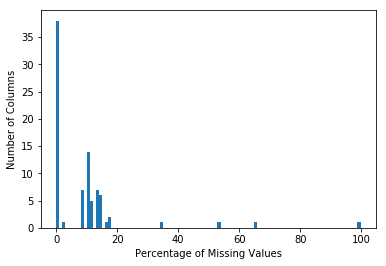

In [8]:
# Investigate patterns in the amount of missing data in each column.

#Creating a chart
plt.hist(percent_missing_per_column, bins=100)

#Renaming axis title
plt.ylabel('Number of Columns')
plt.xlabel('Percentage of Missing Values')

#Displaying the chart created before
plt.show()

In [14]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

#Sum the number of NaN in each column
top_5_outlier=azdias.isna().sum()

#Displaying the values
top_5_outlier

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [19]:
#Sorting the values in order to print the highest
top_5_outlier.sort_values(0,ascending=False,inplace=True)

#Displaying the 6 highest values
top_5_outlier.head(6)

TITEL_KZ        889061
KK_KUNDENTYP    584612
KBA05_BAUMAX    476524
ALTER_HH        310267
REGIOTYP        158064
KKK             158064
dtype: int64

In [20]:
#Sorting the values in order to print the highest
percent_missing_per_column.sort_values(0,ascending=False,inplace=True)

#Displaying the values
percent_missing_per_column

TITEL_KZ                 99.757636
KK_KUNDENTYP             65.596749
KBA05_BAUMAX             53.468668
ALTER_HH                 34.813699
REGIOTYP                 17.735668
KKK                      17.735668
W_KEIT_KIND_HH           16.605084
KBA05_GBZ                14.959701
KBA05_ANTG3              14.959701
KBA05_ANTG2              14.959701
KBA05_ANTG1              14.959701
MOBI_REGIO               14.959701
KBA05_ANTG4              14.959701
PLZ8_ANTG1               13.073637
PLZ8_ANTG2               13.073637
PLZ8_ANTG3               13.073637
PLZ8_ANTG4               13.073637
PLZ8_BAUMAX              13.073637
PLZ8_HHZ                 13.073637
PLZ8_GBZ                 13.073637
KBA13_ANZAHL_PKW         11.871354
ANZ_HAUSHALTE_AKTIV      11.176913
CAMEO_DEUG_2015          11.147852
CAMEO_DEU_2015           11.147852
CAMEO_INTL_2015          11.147852
LP_LEBENSPHASE_FEIN      10.954859
RELAT_AB                 10.926022
ARBEIT                   10.926022
ORTSGR_KLS9         

In [9]:
#Identifying the columns with the highest percentage of missing value
remove_columns = ['TITEL_KZ','KK_KUNDENTYP','KBA05_BAUMAX','ALTER_HH','REGIOTYP','KKK']
na_azdias.drop(labels=remove_columns,axis=1,inplace=True)



/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
#Removing the columns
feat_info = feat_info.set_index('attribute').drop( remove_columns ).reset_index()

#Check
column_drop=na_azdias.isna().sum().sum()

In [23]:
#Get information about the number of rows and of columns
feat_info.shape

(79, 5)

In [24]:
#Get information about the number of rows and of columns
na_azdias.shape

(891221, 79)

#### Discussion 1.1.2: Assess Missing Data in Each Column

After calculating the amount of missing data in each column, I decided to remove the full columns with more 17% of missing values. This correspond to the following columns : 'TITEL_KZ','KK_KUNDENTYP','KBA05_BAUMAX','ALTER_HH','REGIOTYP','KKK'
If I removed all the rows with NaN, I would have lost too much data in the dataset.


#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [11]:
# How much data is missing in each row of the dataset?
na_azdias['na_per_row']=na_azdias.isna().sum(axis=1)

#Displaying the dataset to get an overview
na_azdias

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,na_per_row
0,NaN,2.0,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43
1,NaN,1.0,2,5.0,1,5,2,5,4,5,...,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,1
2,NaN,3.0,2,3.0,1,4,1,2,3,5,...,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,1
3,2.0,4.0,2,2.0,4,2,5,2,1,2,...,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,5
4,NaN,3.0,1,5.0,4,3,4,1,3,2,...,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,1
5,3.0,1.0,2,2.0,3,1,5,2,2,5,...,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,0
6,NaN,2.0,2,5.0,1,5,1,5,4,3,...,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0,2
7,NaN,1.0,1,3.0,3,3,4,1,3,2,...,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0,1
8,NaN,3.0,1,3.0,4,4,2,4,2,2,...,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0,1
9,NaN,3.0,2,4.0,2,4,2,3,5,4,...,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0,1


(array([  6.84781000e+05,   7.86010000e+04,   2.55150000e+04,
          8.17300000e+03,   8.42000000e+02,   1.49000000e+02,
          1.54950000e+04,   3.55500000e+03,   2.80400000e+04,
          4.60700000e+04]),
 array([  0. ,   4.9,   9.8,  14.7,  19.6,  24.5,  29.4,  34.3,  39.2,
         44.1,  49. ]),
 <a list of 10 Patch objects>)

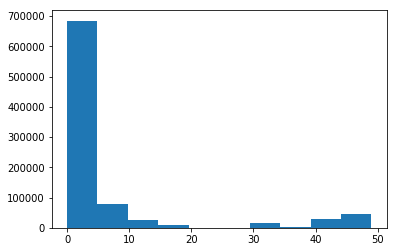

In [18]:
#Displaying a chart to visualize
plt.hist(na_azdias['na_per_row'])


In [12]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
azdias_more_than_30 = na_azdias[na_azdias['na_per_row'] <=25] 
azdias_less_than_30 = na_azdias[na_azdias['na_per_row'] >25]


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


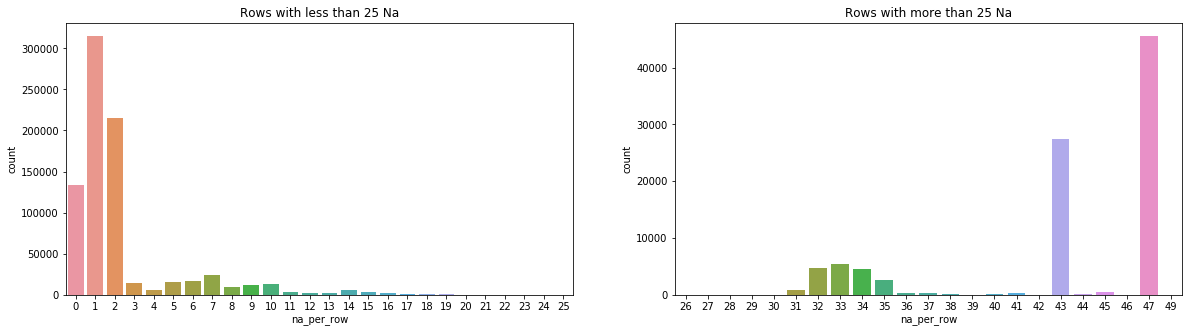

In [13]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

#function to create a chart to compare the distribution between the 2 datasets splitted previously
def distribution_compare (df1, df2, column, title1, title2):
    fig, ax=plt.subplots(1,2,figsize=(20,5))
    sns.countplot(df1[column],ax=ax[0])
    sns.countplot(df2[column],ax=ax[1])
    plt.subplots_adjust(wspace=0.2)
    ax[0].set_title(title1)
    ax[1].set_title(title2)
    fig.show()
    return

#Using the previous function
distribution_compare(azdias_more_than_30, azdias_less_than_30,'na_per_row','Rows with less than 25 Na', 'Rows with more than 25 Na')


In [29]:
#Sum of the NaN value of each column
top_5_outlier=azdias.isna().sum()

#Displaying the result
top_5_outlier

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [30]:
#Sorting the value to get the smallest values on the top
top_5_outlier.sort_values(0,ascending=True,inplace=True)

#Displaying the 6 firsts
top_5_outlier.head(6)

AGER_TYP      0
SEMIO_SOZ     0
SEMIO_FAM     0
SEMIO_REL     0
SEMIO_MAT     0
SEMIO_VERT    0
dtype: int64

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


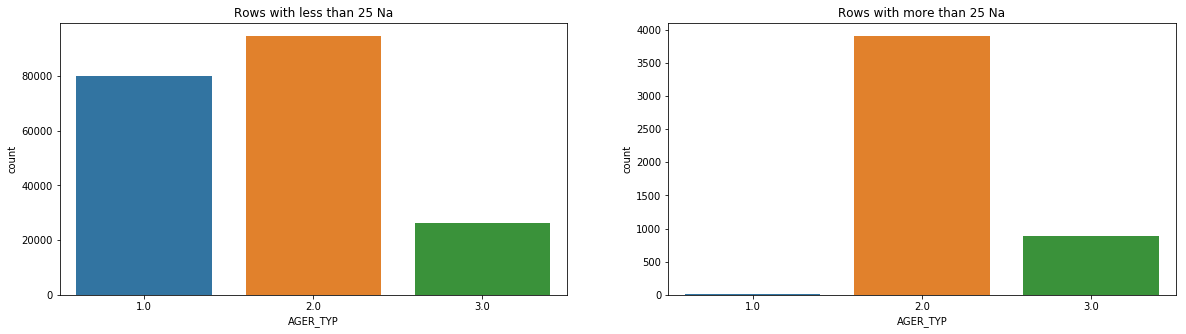

In [31]:
#Using the function to compare the distribution with another column
distribution_compare(azdias_more_than_30, azdias_less_than_30,'AGER_TYP','Rows with less than 25 Na', 'Rows with more than 25 Na')


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


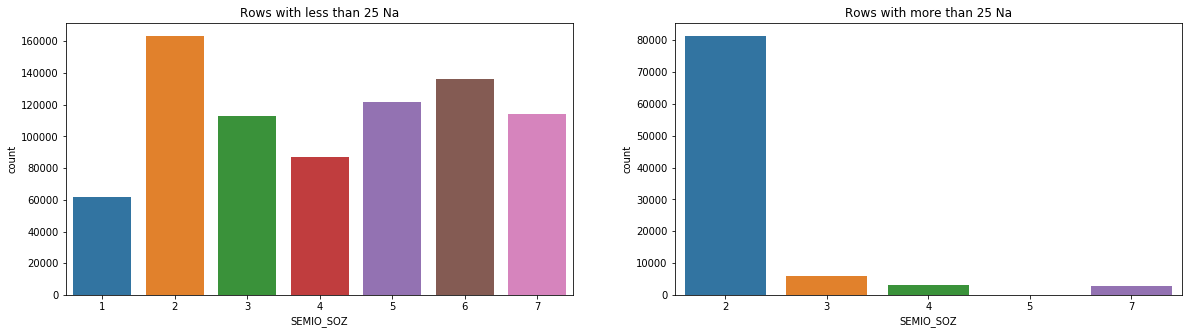

In [32]:
#Using the function to compare the distribution with another column
distribution_compare(azdias_more_than_30, azdias_less_than_30,'SEMIO_SOZ','Rows with less than 25 Na', 'Rows with more than 25 Na')


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


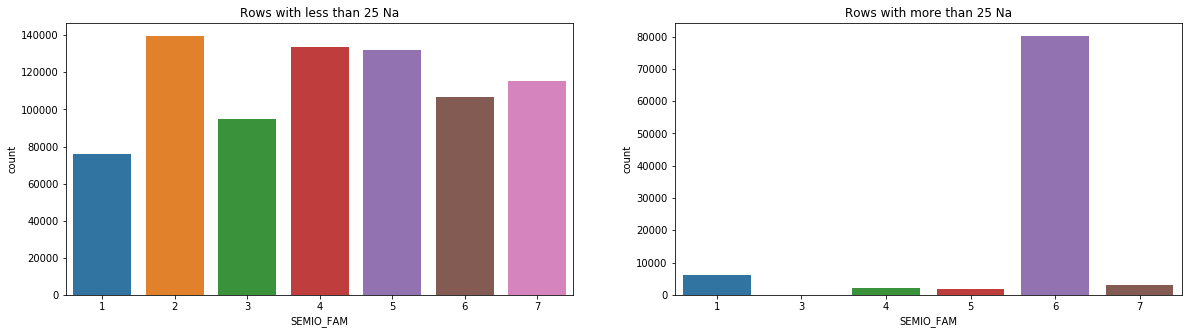

In [33]:
#Using the function to compare the distribution with another column
distribution_compare(azdias_more_than_30, azdias_less_than_30,'SEMIO_FAM','Rows with less than 25 Na', 'Rows with more than 25 Na')


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


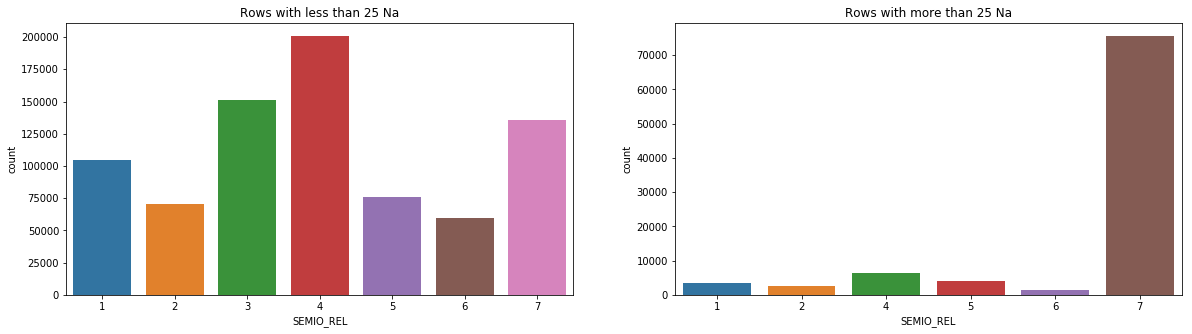

In [34]:
#Using the function to compare the distribution with another column
distribution_compare(azdias_more_than_30, azdias_less_than_30,'SEMIO_REL','Rows with less than 25 Na', 'Rows with more than 25 Na')


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


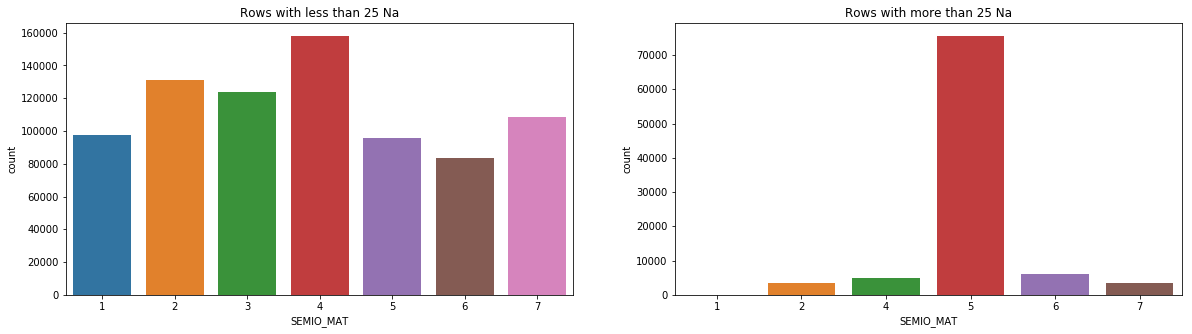

In [35]:
#Using the function to compare the distribution with another column
distribution_compare(azdias_more_than_30, azdias_less_than_30,'SEMIO_MAT','Rows with less than 25 Na', 'Rows with more than 25 Na')


#### Discussion 1.1.3: Assess Missing Data in Each Row


After the previous analysis :
We have a dataset with a total of 891221 rows x 79 columns. Which leads to a total of 70 406 459 cells.
We have as well 8 373 929 NaN values.
That means around 12% of NaN.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [36]:
# How many features are there of each data type?
feat_info['type'].value_counts()


ordinal        47
categorical    19
numeric         7
mixed           6
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [37]:
#Displaying the different unique values inside the column 'type'
feat_info['type'].unique()

array(['categorical', 'ordinal', 'numeric', 'mixed'], dtype=object)

In [14]:
#Initializing what we want to enrich
categorical_feat_info={}

#Giving the different values we want to check (value from the previous cell)
type_feat_info=['categorical', 'ordinal', 'numeric', 'mixed']

#Enriching
for x in type_feat_info:
    categorical_feat_info[x]=feat_info[feat_info['type']== x]['attribute']

In [39]:
#Printing the values
categorical_feat_info

{'categorical': 0             AGER_TYP
 2            ANREDE_KZ
 3        CJT_GESAMTTYP
 10           FINANZTYP
 12     GFK_URLAUBERTYP
 13    GREEN_AVANTGARDE
 17     LP_FAMILIE_FEIN
 18     LP_FAMILIE_GROB
 19      LP_STATUS_FEIN
 20      LP_STATUS_GROB
 21    NATIONALITAET_KZ
 38         SHOPPER_TYP
 39             SOHO_KZ
 40            VERS_TYP
 41            ZABEOTYP
 49         GEBAEUDETYP
 52         OST_WEST_KZ
 54     CAMEO_DEUG_2015
 55      CAMEO_DEU_2015
 Name: attribute, dtype: object, 'ordinal': 1      ALTERSKATEGORIE_GROB
 4         FINANZ_MINIMALIST
 5             FINANZ_SPARER
 6          FINANZ_VORSORGER
 7            FINANZ_ANLEGER
 8     FINANZ_UNAUFFAELLIGER
 9          FINANZ_HAUSBAUER
 14               HEALTH_TYP
 23           RETOURTYP_BK_S
 24                SEMIO_SOZ
 25                SEMIO_FAM
 26                SEMIO_REL
 27                SEMIO_MAT
 28               SEMIO_VERT
 29               SEMIO_LUST
 30                SEMIO_ERL
 31               SEMI

In [15]:
#Filtering where we have the value 'categorical'
categorical_na_azdias=na_azdias[categorical_feat_info['categorical']]

#Getting the info of the dataset filtered
categorical_na_azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 19 columns):
AGER_TYP            205378 non-null float64
ANREDE_KZ           891221 non-null int64
CJT_GESAMTTYP       886367 non-null float64
FINANZTYP           891221 non-null int64
GFK_URLAUBERTYP     886367 non-null float64
GREEN_AVANTGARDE    891221 non-null int64
LP_FAMILIE_FEIN     813429 non-null float64
LP_FAMILIE_GROB     813429 non-null float64
LP_STATUS_FEIN      886367 non-null float64
LP_STATUS_GROB      886367 non-null float64
NATIONALITAET_KZ    782906 non-null float64
SHOPPER_TYP         780025 non-null float64
SOHO_KZ             817722 non-null float64
VERS_TYP            780025 non-null float64
ZABEOTYP            891221 non-null int64
GEBAEUDETYP         798073 non-null float64
OST_WEST_KZ         798073 non-null object
CAMEO_DEUG_2015     791869 non-null object
CAMEO_DEU_2015      791869 non-null object
dtypes: float64(12), int64(4), object(3)
memory usage: 129.2+ MB

In [16]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

#Filtering where we have the value 'categorical'
categorical_na_azdias=na_azdias[categorical_feat_info['categorical']]

#Initializing 2 parameters
categorical_multi_level=[]
categorical_binary=[]

#Creating the loop to enrich those parameters
for a in categorical_na_azdias.columns:
        #get the current columns
        current_col=categorical_na_azdias[a]
        
        #select and count the unique, non NA values
        unique_values= current_col[current_col.notna()].unique()
        count_unique_values= len( unique_values )
        
        #Splitting in 2 if we have more than 2 levels or not
        if count_unique_values >2:
            categorical_multi_level.append(a)
        elif count_unique_values ==2:
            categorical_binary.append(a)
        
        #Printing the final value
        print( a,unique_values, count_unique_values )



AGER_TYP [ 2.  3.  1.] 3
ANREDE_KZ [1 2] 2
CJT_GESAMTTYP [ 2.  5.  3.  4.  1.  6.] 6
FINANZTYP [4 1 6 5 2 3] 6
GFK_URLAUBERTYP [ 10.   1.   5.  12.   9.   3.   8.  11.   4.   2.   7.   6.] 12
GREEN_AVANTGARDE [0 1] 2
LP_FAMILIE_FEIN [  2.   5.   1.  10.   7.  11.   3.   8.   4.   6.   9.] 11
LP_FAMILIE_GROB [ 2.  3.  1.  5.  4.] 5
LP_STATUS_FEIN [  1.   2.   3.   9.   4.  10.   5.   8.   6.   7.] 10
LP_STATUS_GROB [ 1.  2.  4.  5.  3.] 5
NATIONALITAET_KZ [ 1.  3.  2.] 3
SHOPPER_TYP [ 3.  2.  1.  0.] 4
SOHO_KZ [ 1.  0.] 2
VERS_TYP [ 2.  1.] 2
ZABEOTYP [3 5 4 1 6 2] 6
GEBAEUDETYP [ 8.  1.  3.  2.  6.  4.  5.] 7
OST_WEST_KZ ['W' 'O'] 2
CAMEO_DEUG_2015 ['8' '4' '2' '6' '1' '9' '5' '7' '3'] 9
CAMEO_DEU_2015 ['8A' '4C' '2A' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5C' '8B' '7A' '5D' '9E'
 '9B' '1B' '3D' '4E' '4B' '3C' '5A' '7B' '9A' '6D' '6E' '2C' '7C' '9C' '7D'
 '5E' '1D' '8D' '6C' '6A' '5B' '4D' '3A' '2B' '7E' '3B' '6F' '5F' '1C'] 44


In [17]:
# Re-encode categorical variable(s) to be kept in the analysis.

#Categorical variables to remove identified earlier
multi_level_to_remove=['AGER_TYP','CJT_GESAMTTYP','FINANZTYP','GFK_URLAUBERTYP','LP_FAMILIE_FEIN','LP_FAMILIE_GROB',
                      'LP_STATUS_FEIN','LP_STATUS_GROB','NATIONALITAET_KZ','SHOPPER_TYP','ZABEOTYP','GEBAEUDETYP',
                      'CAMEO_DEUG_2015','CAMEO_DEU_2015']

#Dropping Identified column
na_azdias.drop(multi_level_to_remove, axis=1, inplace=True)

#Printing the new shape of the dataset in order to verify the drop worked well
na_azdias.shape

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(891221, 66)

In [18]:
#perform one-hot-encoding
to_encode=[]
to_encode.append('OST_WEST_KZ')

na_azdias_encoded = pd.get_dummies(na_azdias , columns=to_encode)

#Printing the new shape to check the encoding worked
na_azdias_encoded.shape

(891221, 67)

#### Discussion 1.2.1: Re-Encode Categorical Features

For the categorical features, I first checked to get an overview of the different features. Then I filtered to get the categorical only.
After that I identified which are binary category and which are multi level. I dropped those lasts. To finally encode (with one hot encoding) the column OST_WEST_KZ.



#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [19]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
#Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)

#Initializing which value, in the PRAEGENDE_JUGENDJAHRE column, which values correspond to avantgarde and which one to the 
#mainstream
avantgarde=[2,4,6,7,9,11,13,15]
mainstream=[1,3,5,8,10,12,14]

#Initializing 2 others variables to split them by decade for one and by movement for the other
movement=[]
decade=[]

#Creating the loop to split the data into 2 columns as mentionned before
for i in na_azdias_encoded['PRAEGENDE_JUGENDJAHRE']:
    #Here is the split for the movement
    if i in mainstream:
        movement.append(0)
    elif i in avantgarde:
        movement.append(1)
    else:
        movement.append(np.NaN)
        
    #Here is the split for the decade    
    if i in [1,2]:
        decade.append(40)
    elif i in [3,4]:
        decade.append(50)
    elif i in [5,6,7]:
        decade.append(60)
    elif i in [8,9]:
        decade.append(70)
    elif i in [10,11,12,13]:
        decade.append(80)
    elif i in [14,15]:
        decade.append(90)
    else:
        decade.append(np.NaN)
        

#Here is to enrich the values into a column of the dataset
na_azdias_encoded['movement']=movement
na_azdias_encoded['decade']=decade
        
        

In [45]:
#Displaying the value for decade
decade

[nan,
 90,
 90,
 70,
 70,
 50,
 80,
 70,
 80,
 90,
 50,
 nan,
 70,
 90,
 nan,
 60,
 90,
 nan,
 80,
 70,
 80,
 80,
 90,
 70,
 nan,
 90,
 70,
 80,
 80,
 60,
 70,
 80,
 90,
 70,
 50,
 nan,
 70,
 70,
 80,
 80,
 nan,
 90,
 90,
 90,
 70,
 60,
 70,
 50,
 nan,
 80,
 90,
 90,
 90,
 nan,
 nan,
 70,
 80,
 90,
 90,
 80,
 70,
 nan,
 nan,
 90,
 90,
 70,
 90,
 60,
 60,
 nan,
 80,
 70,
 nan,
 80,
 80,
 nan,
 nan,
 70,
 80,
 90,
 80,
 nan,
 90,
 nan,
 70,
 60,
 50,
 80,
 80,
 90,
 90,
 90,
 90,
 60,
 60,
 90,
 80,
 nan,
 90,
 nan,
 40,
 70,
 60,
 nan,
 80,
 80,
 nan,
 80,
 nan,
 nan,
 80,
 70,
 nan,
 50,
 60,
 60,
 80,
 90,
 70,
 40,
 60,
 60,
 90,
 80,
 70,
 60,
 80,
 50,
 80,
 80,
 90,
 80,
 90,
 nan,
 60,
 70,
 90,
 nan,
 70,
 70,
 60,
 90,
 90,
 70,
 nan,
 70,
 90,
 90,
 90,
 80,
 80,
 90,
 90,
 nan,
 nan,
 80,
 nan,
 90,
 nan,
 nan,
 90,
 90,
 90,
 nan,
 90,
 70,
 80,
 40,
 nan,
 90,
 90,
 40,
 70,
 80,
 70,
 nan,
 80,
 70,
 80,
 nan,
 80,
 90,
 50,
 70,
 80,
 70,
 70,
 50,
 40,
 60,
 80,
 nan,
 8

In [46]:
#Displaying the value for movement
movement

[nan,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 nan,
 0,
 1,
 nan,
 0,
 0,
 nan,
 0,
 1,
 1,
 0,
 0,
 1,
 nan,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 nan,
 0,
 0,
 0,
 1,
 nan,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 nan,
 0,
 0,
 1,
 0,
 nan,
 nan,
 0,
 1,
 0,
 1,
 0,
 0,
 nan,
 nan,
 1,
 0,
 0,
 0,
 0,
 0,
 nan,
 1,
 0,
 nan,
 0,
 1,
 nan,
 nan,
 0,
 0,
 1,
 0,
 nan,
 0,
 nan,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 nan,
 1,
 nan,
 1,
 0,
 0,
 nan,
 0,
 1,
 nan,
 0,
 nan,
 nan,
 0,
 0,
 nan,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 nan,
 0,
 0,
 0,
 nan,
 0,
 0,
 0,
 1,
 1,
 0,
 nan,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 nan,
 nan,
 0,
 nan,
 1,
 nan,
 nan,
 0,
 1,
 0,
 nan,
 0,
 0,
 0,
 0,
 nan,
 1,
 0,
 0,
 1,
 0,
 0,
 nan,
 0,
 0,
 0,
 nan,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 nan,
 1,
 nan,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 nan,
 0,
 0,
 nan,
 1,
 1,
 0,
 nan,
 nan,
 0,
 0,
 nan,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 nan

In [47]:
#Checking if it is well implemented in the dataset
na_azdias_encoded['movement'].head()

0    NaN
1    0.0
2    1.0
3    0.0
4    0.0
Name: movement, dtype: float64

In [48]:
#Checking if it is well implemented in the dataset
na_azdias_encoded['decade'].head()

0     NaN
1    90.0
2    90.0
3    70.0
4    70.0
Name: decade, dtype: float64

In [20]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

#Initializing 2 variables
wealth=[]
life_stage_typology=[]

#Creating the loop
for i in na_azdias_encoded['CAMEO_INTL_2015']:
    
    #Getting the 2nd digit as the 2 digits correspond to 2 different informations
    ones=float(i) % 10
    #Here is to get the first digit, so, the first information
    tens = float(i) - ones
    #Clustering the information depending on the value and enriching the variable
    if 10 == tens :
        wealth.append(1)
    elif 20 ==tens :
        wealth.append(2)
    elif 30 ==tens :
        wealth.append(3)
    elif 40 ==tens :
        wealth.append(4)
    elif 50 ==tens :
        wealth.append(5)
    else:
        wealth.append(np.NaN)

    life_stage_typology.append(ones)
    
#Here is to enrich the values into a column of the dataset
na_azdias_encoded['wealth']=wealth
na_azdias_encoded['life_stage_typology']=life_stage_typology





In [21]:
#Displaying the firsts rows to check if what we performed previously worked
na_azdias_encoded['wealth'].head()

0    NaN
1    5.0
2    2.0
3    1.0
4    4.0
Name: wealth, dtype: float64

In [22]:
#Displaying the firsts rows to check if what we performed previously worked
na_azdias_encoded['life_stage_typology'].head()

0    NaN
1    1.0
2    4.0
3    2.0
4    3.0
Name: life_stage_typology, dtype: float64

#### Discussion 1.2.2: Engineer Mixed-Type Features

By analysis this column content (PRAEGENDE_JUGENDJAHRE), we had in one column 2 kinds of information that could be splitted : the decade and the movement. So that we identified and analysed the column content. Then, we splitted this column in 2 : movement and decade.
For this column (CAMEO_INTL_2015), we act the same : we analysed the content and swa that as well we had 2 kinds of information into only one column. That's why we decided to split it into 2 columns : the first one is about the wealth and the second one about the life style typology.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [23]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

#Converting the column into a list of column
column_list = na_azdias_encoded.columns.values.tolist()

#Creating a loop to get all the unique values for each column
for column_name in column_list:
      #Printing the result
        print(na_azdias_encoded[column_name].unique())








[  2.   1.   3.   4.  nan]
[1 2]
[3 1 4 2 5]
[4 5 2 3 1]
[3 2 1 5 4]
[5 2 1 4 3]
[5 4 3 1 2]
[3 5 2 4 1]
[   nan  1996.  1979.  1957.  1963.  1943.  1964.  1974.  1975.  1941.
  1993.  1946.  1988.  1991.  1966.  1949.  1982.  1972.  1990.  1985.
  1989.  1948.  1935.  1997.  1994.  1987.  2002.  1950.  1965.  1969.
  1978.  1958.  1944.  1967.  1977.  1960.  1970.  1973.  1971.  1937.
  1947.  1926.  1954.  1981.  1962.  1992.  2008.  1976.  1928.  1927.
  1968.  1940.  1952.  1961.  2006.  1938.  1945.  1942.  1984.  1930.
  1980.  1959.  1986.  1931.  1955.  1983.  2010.  1951.  1921.  1929.
  1939.  2001.  1995.  1956.  1953.  2012.  1934.  1913.  1914.  1922.
  2004.  1936.  2009.  1915.  2003.  2013.  1998.  2007.  1932.  2005.
  1923.  1925.  2015.  1933.  2017.  2000.  1999.  2014.  1920.  1918.
  1924.  2016.  2011.  1908.  1919.  1916.  1917.  1912.  1911.  1909.
  1910.  1904.  1906.  1905.  1900.  1907.  1902.]
[0 1]
[ nan   3.   2.   1.]
[ 15.  21.   3.  nan  32.   8.   2.

In [24]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

#Dropping the column where we previously splitted the different paramters in different columns
na_azdias_encoded.drop( ['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'] , axis=1 , inplace=True)


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [25]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...  
    
    # remove selected columns and rows, ...

    # select, re-encode, and engineer column values.
    
    # Return the cleaned dataframe.
    
    
     # Put in code here to execute all main cleaning steps:
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep =';' )
    
    # convert missing value codes into NaNs, ...
    #Creating a loop to remove '[]' and splitting
    for index in feat_info.index:
        feat_info.loc[index,'missing_or_unknown'] = feat_info.loc[index,'missing_or_unknown'].strip('[]').split(',')
    #Creating another loop to replace the missing value by NaN
    for item in range(len(feat_info.loc[index,'missing_or_unknown'])):
        try:
            feat_info.loc[index,'missing_or_unknown'][item] = int(feat_info.loc[index,'missing_or_unknown'][item])
        except:
            continue
    df.loc[:,(feat_info.loc[index, 'attribute'])].replace(feat_info.loc[index,'missing_or_unknown'], np.nan, inplace=True)
    
    # remove selected columns and rows, ...
    outlier_cols = ['TITEL_KZ','KK_KUNDENTYP','KBA05_BAUMAX','ALTER_HH','REGIOTYP','KKK']
    
    #Dropping the columns
    df_new = df.drop(outlier_cols, axis = 1)
    df_clean = df_new[df_new.isnull().sum(axis=1) <30]
    
    #Getting the categorical values
    categorical = feat_info[feat_info['type'] == 'categorical']['attribute'].values
    categorical_features = feat_info[feat_info['type'] == 'categorical']['attribute'].values
    categorical_features = [x for x in categorical_features if x in df_clean.columns] 
    
    #Splitting into 2 categories : binary and multilevel
    binary_cols = [x for x in categorical_features if df_clean[x].nunique()==2]
    multilevel = [x for x in categorical_features if df_clean[x].nunique()>2]
    
    #Replacing values in OST_WEST_KZ column
    df_clean['OST_WEST_KZ'] = df_clean['OST_WEST_KZ'].replace({'O':0.0, 'W':1.0})
    
    #Dropping the multilevel
    df_encoded = df_clean.drop(multilevel, axis =1)
    
    
    # select, re-encode, and engineer column values.
    
    
    #Initializing which value, in the PRAEGENDE_JUGENDJAHRE column, which values correspond to avantgarde and which one to the 
    #mainstream
    avantgarde=[2,4,6,7,9,11,13,15]
    mainstream=[1,3,5,8,10,12,14]
    
    #Initializing 2 others variables to split them by decade for one and by movement for the other
    movement=[]
    decade=[]
    
    #Creating the loop to split the data into 2 columns as mentionned before
    for i in df_encoded['PRAEGENDE_JUGENDJAHRE']:
        #Here is the split for the movement
        if i in mainstream:
            movement.append(0)
        elif i in avantgarde:
            movement.append(1)
        else:
            movement.append(np.NaN) 
        #Here is the split for the decade
        if i in [1,2]:
            decade.append(40)
        elif i in [3,4]:
            decade.append(50)
        elif i in [5,6,7]:
            decade.append(60)
        elif i in [8,9]:
            decade.append(70)
        elif i in [10,11,12,13]:
            decade.append(80)
        elif i in [14,15]:
            decade.append(90)
        else:
            decade.append(np.NaN)
    #Here is to enrich the values into a column of the dataset
    df_encoded['movement']=movement
    df_encoded['decade']=decade
    
    df_encoded['CAMEO_INTL_2015'] = pd.to_numeric(df_encoded['CAMEO_INTL_2015'], errors = 'coerce')
    
    #Initializing 2 variables                           
    wealth=[]
    life_stage_typology=[]
    
    #Creating the loop
    for i in df_encoded['CAMEO_INTL_2015']:
        #Getting the 2nd digit as the 2 digits correspond to 2 different informations
        ones=float(i) % 10
        #Here is to get the first digit, so, the first information
        tens = float(i) - ones
        #Clustering the information depending on the value and enriching the variable
        if 10 == tens :
            wealth.append(1)
        elif 20 ==tens :
            wealth.append(2)
        elif 30 ==tens :
            wealth.append(3)
        elif 40 ==tens :
            wealth.append(4)
        elif 50 ==tens :
            wealth.append(5)
        else:
            wealth.append(np.NaN)

        life_stage_typology.append(ones)  
        
    #Here is to enrich the values into a column of the dataset
    df_encoded['wealth']=wealth
    df_encoded['life_stage_typology']=life_stage_typology
        
    df_clean = df_encoded.drop(['PRAEGENDE_JUGENDJAHRE','CAMEO_INTL_2015'], axis =1 )
        
    return df_clean

In [26]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',delimiter=';')

#Applying the function we just defined
clean_data(azdias)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GEBURTSJAHR,GREEN_AVANTGARDE,...,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,movement,decade,wealth,life_stage_typology
1,1,2,1,5,2,5,4,5,1996,0,...,1.0,5.0,4.0,3.0,5.0,4.0,0.0,90.0,5.0,1.0
2,3,2,1,4,1,2,3,5,1979,1,...,1.0,4.0,4.0,3.0,5.0,2.0,1.0,90.0,2.0,4.0
3,4,2,4,2,5,2,1,2,1957,0,...,1.0,3.0,4.0,2.0,3.0,3.0,0.0,70.0,1.0,2.0
4,3,1,4,3,4,1,3,2,1963,0,...,2.0,3.0,3.0,4.0,6.0,5.0,0.0,70.0,4.0,3.0
5,1,2,3,1,5,2,2,5,1943,0,...,1.0,5.0,5.0,2.0,3.0,3.0,0.0,50.0,5.0,4.0
6,2,2,1,5,1,5,4,3,0,0,...,1.0,5.0,5.0,4.0,6.0,3.0,0.0,80.0,2.0,2.0
7,1,1,3,3,4,1,3,2,1964,0,...,1.0,4.0,4.0,2.0,5.0,2.0,0.0,70.0,1.0,4.0
8,3,1,4,4,2,4,2,2,1974,1,...,1.0,3.0,3.0,2.0,4.0,3.0,1.0,80.0,1.0,3.0
9,3,2,2,4,2,3,5,4,1975,1,...,1.0,3.0,3.0,2.0,3.0,1.0,1.0,90.0,1.0,5.0
10,3,2,2,2,5,3,1,5,1941,0,...,2.0,3.0,3.0,4.0,6.0,5.0,0.0,50.0,5.0,1.0


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [27]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
from sklearn.preprocessing import Imputer

#Using the imputer
imputer = Imputer(strategy = 'mean')
azdias_clean = pd.DataFrame(imputer.fit_transform(na_azdias_encoded), columns= na_azdias_encoded.columns)


In [57]:
#Displaying the first rows
azdias_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GEBURTSJAHR,GREEN_AVANTGARDE,...,ARBEIT,ORTSGR_KLS9,RELAT_AB,na_per_row,OST_WEST_KZ_O,OST_WEST_KZ_W,movement,decade,wealth,life_stage_typology
0,2.0,1.0,3.0,4.0,3.0,5.0,5.0,3.0,1967.102689,0.0,...,3.166686,5.293389,3.071033,43.0,0.0,0.0,0.22377,73.328046,3.262098,2.873033
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,1996.000000,0.0,...,3.000000,5.000000,4.000000,1.0,0.0,1.0,0.00000,90.000000,5.000000,1.000000
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1979.000000,1.0,...,3.000000,5.000000,2.000000,1.0,0.0,1.0,1.00000,90.000000,2.000000,4.000000
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,1957.000000,0.0,...,2.000000,3.000000,3.000000,5.0,0.0,1.0,0.00000,70.000000,1.000000,2.000000
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,1963.000000,0.0,...,4.000000,6.000000,5.000000,1.0,0.0,1.0,0.00000,70.000000,4.000000,3.000000


In [58]:
#Checking if there is no null value anymore
azdias_clean.isnull().sum().sum()

0

In [28]:
# Apply feature scaling to the general population demographics data.

from sklearn.preprocessing import StandardScaler

#Applying standard scaler
scaler = StandardScaler()
azdias_scaled = scaler.fit_transform(azdias_clean)
azdias_scaled= pd.DataFrame(azdias_scaled, columns= azdias_clean.columns)

#Displaying the first rows
azdias_scaled.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GEBURTSJAHR,GREEN_AVANTGARDE,...,ARBEIT,ORTSGR_KLS9,RELAT_AB,na_per_row,OST_WEST_KZ_O,OST_WEST_KZ_W,movement,decade,wealth,life_stage_typology
0,-0.750972,-1.045218,-0.056416,0.804890,-0.303378,1.285741,1.429871,-0.055511,-1.707742e-14,-0.494701,...,-4.709754e-16,2.042688e-15,-3.458487e-16,2.830400,-0.482932,-1.550999,-1.420953e-16,3.116720e-15,3.216984e-16,6.346104e-16
1,-1.742724,0.956738,-1.570358,1.487601,-1.059731,1.285741,0.757254,1.422415,2.170398e+00,-0.494701,...,-1.767775e-01,-1.349507e-01,7.234631e-01,-0.426939,-0.482932,0.644746,-5.727990e-01,1.218829e+00,1.258937e+00,-1.338297e+00
2,0.240781,0.956738,-1.570358,0.804890,-1.816084,-0.675554,0.084637,1.422415,8.935746e-01,2.021423,...,-1.767775e-01,-1.349507e-01,-8.341011e-01,-0.426939,-0.482932,0.644746,1.986963e+00,1.218829e+00,-9.142640e-01,8.052265e-01
3,1.232533,0.956738,0.700556,-0.560532,1.209329,-0.675554,-1.260597,-0.794475,-7.587855e-01,-0.494701,...,-1.237320e+00,-1.054896e+00,-5.531897e-02,-0.116716,-0.482932,0.644746,-5.727990e-01,-2.433020e-01,-1.638664e+00,-6.237891e-01
4,0.240781,-1.045218,0.700556,0.122179,0.452976,-1.329319,0.084637,-0.794475,-3.081418e-01,-0.494701,...,8.837647e-01,3.250218e-01,1.502245e+00,-0.426939,-0.482932,0.644746,-5.727990e-01,-2.433020e-01,5.345367e-01,9.071870e-02


### Discussion 2.1: Apply Feature Scaling

Before applying the feature standardscaler, we needed to remove all the NaN value, in all rows / all columns.
Then, we applied the feature standardscaler because our goal was to get all the data with a standards deviation at 1 and a mean at 0.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [29]:
# Apply PCA to the data.
from sklearn.decomposition import PCA 

#Creating a function to perform a PCA
def do_pca(n_components, data):
    pca=PCA(n_components)
    x_pca= pca.fit_transform(data)
    return pca, x_pca


In [30]:
#Using the previous function we created for PCA
pca, x_pca=do_pca(20, azdias_scaled)

In [31]:
#Calculating the sum of the variance
pca.explained_variance_ratio_.sum()

0.78136355094171972

Text(0.5,1,'Explained variance per principal component')

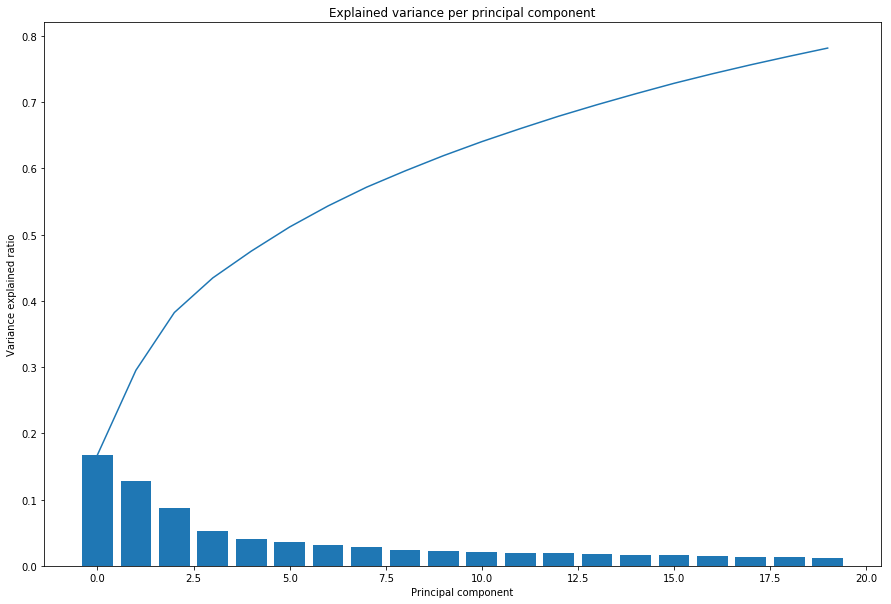

In [32]:
# Investigate the variance accounted for by each principal component.

#Getting the valu in order to display a chart
num_components = len(pca.explained_variance_ratio_)
ind = np.arange(num_components)
vals = pca.explained_variance_ratio_

#Displaying a chart with the needed information
plt.figure(figsize=(15, 10))
ax = plt.subplot(111)
cumvals = np.cumsum(vals)
ax.bar(ind, vals)
    
ax.plot(ind, cumvals)
 
#Updating.changing the chart title and axis titles    
ax.set_xlabel("Principal component")
ax.set_ylabel("Variance explained ratio")
    
plt.title('Explained variance per principal component')


In [33]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(n_components = 20)
pca_azdias = pca.fit_transform(azdias_scaled)

In [34]:
#Calculating the sum of the variance
pca.explained_variance_ratio_.sum()

0.78138977749222915

### Discussion 2.2: Perform Dimensionality Reduction


More than 50% of the variation is explained by 6 components
20 components explained 80% of the variation which seems good for further analysis

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [35]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def pca_map_function(pca, i):
    df = pd.DataFrame(pca.components_, columns=list(azdias_scaled.columns))
    weights = df.iloc[i].sort_values(ascending=False)
    return weights


In [41]:
#Here is the previsous function use for the firsts weight
weight_1=pca_map_function(pca,1)

#Displaying the result
weight_1

ALTERSKATEGORIE_GROB     0.265499
FINANZ_VORSORGER         0.251455
SEMIO_ERL                0.212616
SEMIO_LUST               0.180125
RETOURTYP_BK_S           0.172151
W_KEIT_KIND_HH           0.126312
FINANZ_MINIMALIST        0.103069
FINANZ_HAUSBAUER         0.095826
EWDICHTE                 0.074445
ORTSGR_KLS9              0.073488
PLZ8_ANTG3               0.072814
PLZ8_ANTG4               0.069757
WOHNDAUER_2008           0.067161
PLZ8_BAUMAX              0.065344
HH_EINKOMMEN_SCORE       0.056918
ARBEIT                   0.054943
wealth                   0.054556
KBA05_ANTG4              0.053123
RELAT_AB                 0.052620
PLZ8_ANTG2               0.050144
ANZ_HAUSHALTE_AKTIV      0.049745
SEMIO_KRIT               0.046071
SEMIO_KAEM               0.043002
ANREDE_KZ                0.039423
OST_WEST_KZ_O            0.031360
VERS_TYP                 0.030060
KBA05_ANTG3              0.029018
ANZ_HH_TITEL             0.027463
SEMIO_DOM                0.014535
OST_WEST_KZ_W 

In [68]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

weight_2=pca_map_function(pca,2)
weight_2

SEMIO_VERT               0.355182
SEMIO_SOZ                0.296713
SEMIO_KULT               0.294464
SEMIO_FAM                0.236720
FINANZ_MINIMALIST        0.123571
SEMIO_MAT                0.073665
SEMIO_REL                0.066210
RETOURTYP_BK_S           0.065716
GREEN_AVANTGARDE         0.062013
W_KEIT_KIND_HH           0.054181
OST_WEST_KZ_W            0.053495
FINANZ_VORSORGER         0.047154
movement                 0.041787
HH_EINKOMMEN_SCORE       0.031899
PLZ8_BAUMAX              0.031805
PLZ8_ANTG4               0.028836
ORTSGR_KLS9              0.028164
PLZ8_ANTG3               0.027657
EWDICHTE                 0.026879
OST_WEST_KZ_O            0.025267
ALTERSKATEGORIE_GROB     0.021070
ARBEIT                   0.020433
RELAT_AB                 0.019273
PLZ8_ANTG2               0.018550
wealth                   0.016737
WOHNDAUER_2008           0.014192
KBA05_ANTG4              0.013103
ANZ_HAUSHALTE_AKTIV      0.012744
ANZ_PERSONEN             0.007481
ANZ_TITEL     

In [69]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

weight_3=pca_map_function(pca,3)
weight_3

movement                 0.342783
GREEN_AVANTGARDE         0.338631
EWDICHTE                 0.257921
ORTSGR_KLS9              0.257769
LP_LEBENSPHASE_FEIN      0.256529
LP_LEBENSPHASE_GROB      0.253284
ANZ_PERSONEN             0.228919
ONLINE_AFFINITAET        0.178799
RELAT_AB                 0.122570
PLZ8_ANTG3               0.101311
PLZ8_ANTG2               0.100571
SEMIO_DOM                0.097865
KBA05_ANTG1              0.094304
OST_WEST_KZ_W            0.091576
PLZ8_HHZ                 0.089030
ARBEIT                   0.085115
PLZ8_ANTG4               0.084060
SEMIO_KAEM               0.080007
FINANZ_MINIMALIST        0.077976
PLZ8_BAUMAX              0.068854
MOBI_REGIO               0.062630
FINANZ_UNAUFFAELLIGER    0.056738
WOHNDAUER_2008           0.051077
KBA05_GBZ                0.045691
ANZ_TITEL                0.039531
life_stage_typology      0.038792
decade                   0.037342
GEBURTSJAHR              0.030678
VERS_TYP                 0.029860
SEMIO_RAT     

### Discussion 2.3: Interpret Principal Components

After the investigation, we can see there are some relationships between positive value and between negative weights. For the first principal component we have ALTERSKATEGORIE_GROB with a positive weight of 0.265499 and FINANZ_SPARER with a negative weight.



## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [36]:
# Over a number of different cluster counts...
from sklearn.cluster import KMeans
from time import time


    # run k-means clustering on the data and...
#Initializing the variable
score   = []

#Choosing and limiting the range of application not to get a too long analysis (computer performances limited and time saving)
k_range = np.arange(8,15)

#Creating the loop
for c in k_range:
    #Using the Kmean method
    kmean = KMeans(n_clusters = c)
    fit_kmean = kmean.fit(pca_azdias) 
    
    #Filling in the score variable
    score.append(np.abs(fit_kmean.score(pca_azdias)))
    

    
    

In [71]:
#Displaying the score values
score

[32142827.295778219,
 30640588.853207339,
 29385243.650330547,
 28270479.182137832,
 27412874.020101406,
 26668359.174300596,
 25938370.896921042,
 25294951.421793342,
 24756464.209215984,
 24343310.017462391]

In [38]:
#Displaying the different values of the range
k_range

array([ 8,  9, 10, 11, 12, 13, 14])

Text(0,0.5,'Average distance to the center of the cluster')

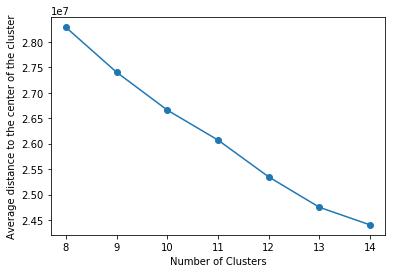

In [37]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
#Creating a chart to visualize
plt.plot(k_range, score, linestyle='-', marker='o')

#Choosing titles
plt.xlabel('Number of Clusters')
plt.ylabel('Average distance to the center of the cluster')


In [37]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

#Using Kmean with 13 clusters
kmeans = KMeans(n_clusters = 13)
model_13 = kmeans.fit(pca_azdias)
azdias_prediction = model_13.predict(pca_azdias)


### Discussion 3.1: Apply Clustering to General Population

I performed the clustering with Kmean. Kmean method was applied to the data transformed with PCA. And after vizualisation I chose 13 clusters to segment the population.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [38]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',delimiter=';')

#Displaying the firsts rows
#customers.head()

azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [39]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

customers_clean=customers.copy()
customers_clean=clean_data(customers_clean)
customers_clean.head()

azdias_clean=azdias.copy()
azdias_clean=clean_data(azdias_clean)
azdias_clean.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GEBURTSJAHR,GREEN_AVANTGARDE,...,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,movement,decade,wealth,life_stage_typology
1,1,2,1,5,2,5,4,5,1996,0,...,1.0,5.0,4.0,3.0,5.0,4.0,0.0,90.0,5.0,1.0
2,3,2,1,4,1,2,3,5,1979,1,...,1.0,4.0,4.0,3.0,5.0,2.0,1.0,90.0,2.0,4.0
3,4,2,4,2,5,2,1,2,1957,0,...,1.0,3.0,4.0,2.0,3.0,3.0,0.0,70.0,1.0,2.0
4,3,1,4,3,4,1,3,2,1963,0,...,2.0,3.0,3.0,4.0,6.0,5.0,0.0,70.0,4.0,3.0
5,1,2,3,1,5,2,2,5,1943,0,...,1.0,5.0,5.0,2.0,3.0,3.0,0.0,50.0,5.0,4.0


In [43]:
#Check how many NaN exist in cleaned Customer dataset
count_nan = azdias_clean.isnull().sum()

#Displaying the result
print (count_nan)

ALTERSKATEGORIE_GROB         0
ANREDE_KZ                    0
FINANZ_MINIMALIST            0
FINANZ_SPARER                0
FINANZ_VORSORGER             0
FINANZ_ANLEGER               0
FINANZ_UNAUFFAELLIGER        0
FINANZ_HAUSBAUER             0
GEBURTSJAHR                  0
GREEN_AVANTGARDE             0
HEALTH_TYP                   0
LP_LEBENSPHASE_FEIN       4754
LP_LEBENSPHASE_GROB       4754
RETOURTYP_BK_S            4754
SEMIO_SOZ                    0
SEMIO_FAM                    0
SEMIO_REL                    0
SEMIO_MAT                    0
SEMIO_VERT                   0
SEMIO_LUST                   0
SEMIO_ERL                    0
SEMIO_KULT                   0
SEMIO_RAT                    0
SEMIO_KRIT                   0
SEMIO_DOM                    0
SEMIO_KAEM                   0
SEMIO_PFLICHT                0
SEMIO_TRADV                  0
SOHO_KZ                      0
ANZ_PERSONEN                 0
                         ...  
KONSUMNAEHE                 72
MIN_GEBA

In [40]:
#Dropping the NaN values
azdias_clean = azdias_clean.dropna()
customers_clean = customers_clean.dropna()

In [45]:
#Check if the sum of NaN is 0
azdias_clean.isnull().sum().sum()

0

In [41]:
# Fitting scaler to general population
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
azdias_clean_scaled=scaler.fit(azdias_clean)


customer_clean_scaled = scaler.transform(customers_clean)

#scaler = StandardScaler()
#scaler.fit(customers_clean)
#customer_clean_scaled = scaler.transform(customers_clean)

In [42]:
# Fitting pca to general population
pca = PCA(n_components=66)
azdias_clean_pca=pca.fit_transform(azdias_clean)
customer_clean_pca = pca.transform(customer_clean_scaled)

#pca = PCA(n_components=66)
#pca.fit(customer_clean_scaled)
#customer_clean_pca = pca.transform(customer_clean_scaled)

In [53]:
# Fitting kmeans to general population
kmeans = KMeans(n_clusters=13)
model = kmeans.fit(azdias_clean_pca)

#kmeans = KMeans(n_clusters=13)
model2 = kmeans.transform(customer_clean_pca)


In [54]:
#Using the model to predict
azdias_prediction = model.predict(azdias_clean_pca)
#azdias_prediction

customer_prediction = model.predict(customer_clean_pca)
#customer_prediction

In [55]:
azdias_prediction

array([ 8,  6, 10, ...,  1,  5, 11], dtype=int32)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

Text(0.5,1,'General population clusters')

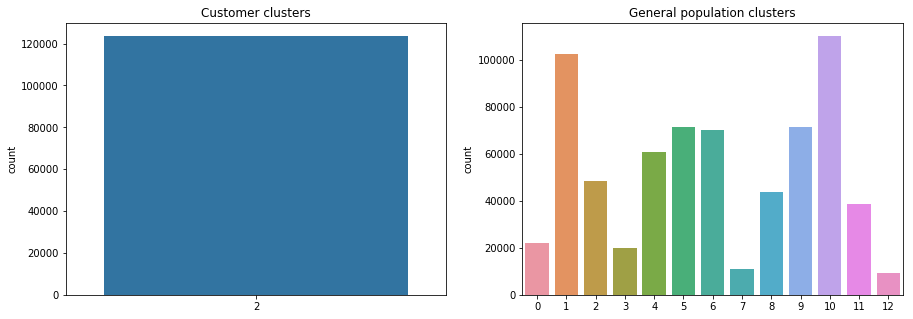

In [56]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

#Creation of chart to visualize and to compare more easily
figure, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
#Set the value of the axis
#sns.countplot(customer_prediction, ax=axs[0])
sns.countplot(customer_prediction, ax=axs[0])
#Set title
axs[0].set_title('Customer clusters')
#Set the value of the axis
sns.countplot(azdias_prediction, ax=axs[1])
#Set title
axs[1].set_title('General population clusters')

In [71]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
cluster_overrepresented = scaler.inverse_transform(pca.inverse_transform(model.cluster_centers_[12]))
overrepresented = pd.Series(data = cluster_overrepresented, index = customers_clean.columns)

#Sorting the value to get the biggest values on the top
overrepresented.sort_values(0,ascending=False,inplace=True)

#Displaying the 6 firsts
overrepresented.head(6)


MIN_GEBAEUDEJAHR       1991.988517
GEBURTSJAHR             961.301076
KBA13_ANZAHL_PKW        661.477263
decade                   43.430076
LP_LEBENSPHASE_FEIN      24.790912
WOHNDAUER_2008            9.016316
dtype: float64

In [74]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
cluster_underrepresented = scaler.inverse_transform(pca.inverse_transform(model.cluster_centers_[11]))
underrepresented = pd.Series(data = cluster_underrepresented, index = customers_clean.columns)

#Sorting the value to get the smallest values on the top
underrepresented.sort_values(0,ascending=True,inplace=True)

#Displaying the 6 firsts
underrepresented.head(6)

PLZ8_ANTG4    -0.914217
KBA05_ANTG4   -0.709743
KBA05_ANTG1   -0.611600
PLZ8_BAUMAX   -0.297528
OST_WEST_KZ   -0.204118
PLZ8_ANTG3    -0.012709
dtype: float64

### Discussion 3.3: Compare Customer Data to Demographics Data


Comparing customer population and clusters, it seems that cluster number 12 is over represented while cluster number 11 looks under represented.
The first year of building is an important parameter and the size of the office is not an  important parameter to take into account.



> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.